In [2]:
import numpy as np
from os import path
import matplotlib.pyplot as plt
from scipy.stats import entropy
from os import listdir
import pandas as pd
from sklearn.preprocessing import normalize,StandardScaler



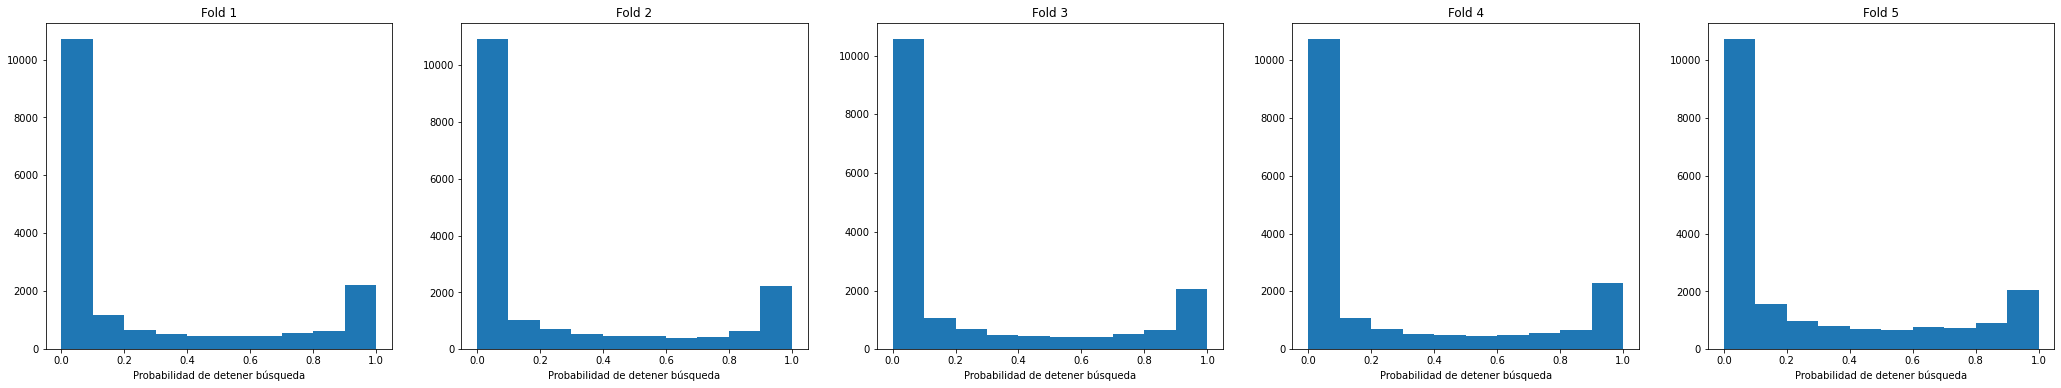

In [3]:
#distribuciones generales
fig, ax = plt.subplots(1, 5, figsize = (36,6))
for i in range(1,6):
    outputs = np.load(path.abspath(f"gng-outputs-{i}.npz"))["outputs"]
    outputs = outputs[int(outputs.shape[0]/2):]
    ax[i-1].hist(outputs)
    ax[i-1].set_title(f"Fold {i}")
    ax[i-1].set_xlabel("Probabilidad de detener búsqueda")
    


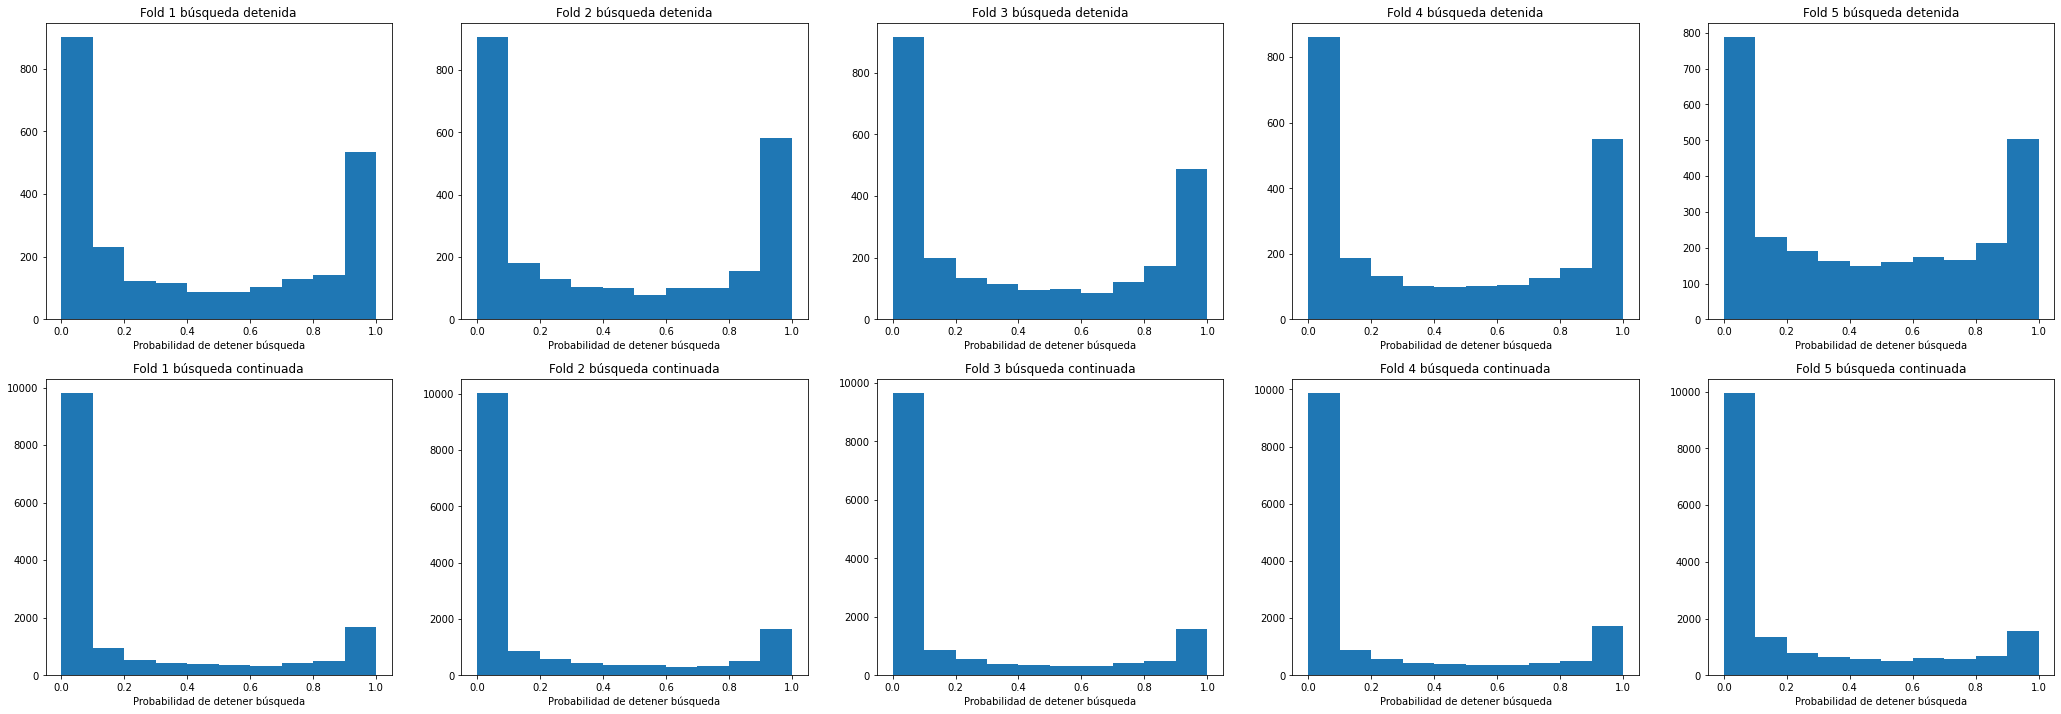

In [4]:
#distribuciones por label
fig, ax = plt.subplots(2, 5, figsize = (36,12))
for i in range(1,6):
    dict = np.load(path.abspath(f"gng-outputs-{i}.npz"))
    outputs = dict["outputs"]
    labels = dict["labels"]
    labels = labels[int(labels.shape[0]/2):]
    outputs = outputs[int(outputs.shape[0]/2):]
    continue_labels_indexes = np.where(labels == 0)[0]
    stop_labels_indexes = np.where(labels == 1)[0]
    stop_outputs = outputs[stop_labels_indexes]
    continue_outputs = outputs[continue_labels_indexes]
    ax[0][i-1].hist(stop_outputs)
    ax[0][i-1].set_title(f"Fold {i} búsqueda detenida")
    ax[0][i-1].set_xlabel("Probabilidad de detener búsqueda")
    ax[1][i-1].hist(continue_outputs)
    ax[1][i-1].set_title(f"Fold {i} búsqueda continuada")
    ax[1][i-1].set_xlabel("Probabilidad de detener búsqueda")

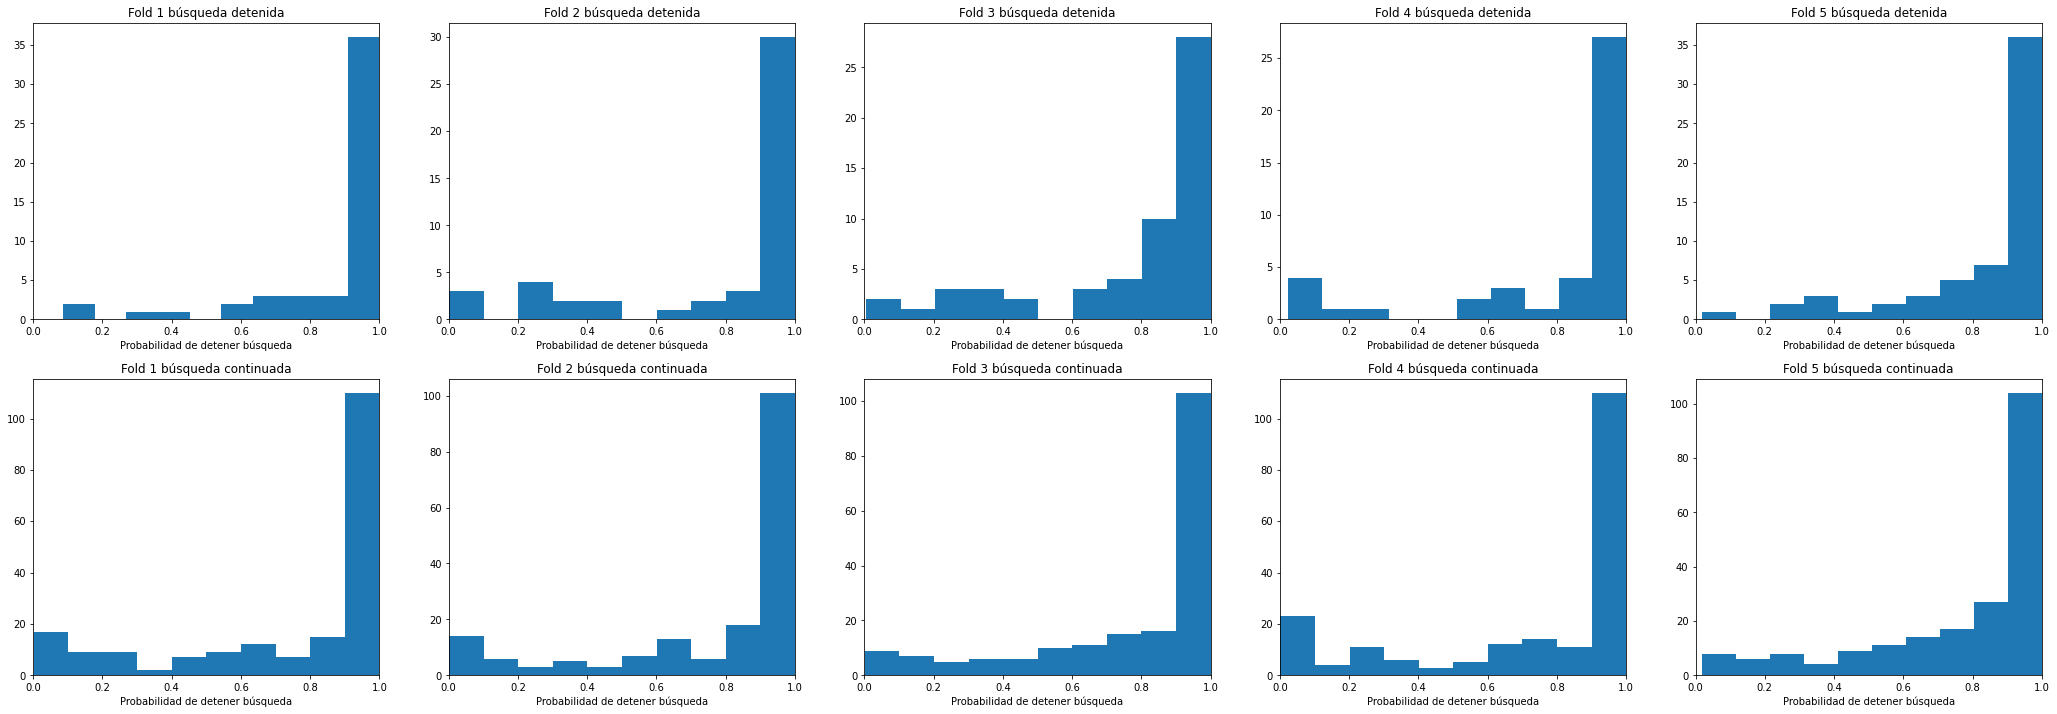

In [5]:
#distribuciones por número de fijación
fig, ax = plt.subplots(2, 5, figsize = (36,12))
for i in range(1,6):
    dict = np.load(path.abspath(f"gng-outputs-{i}.npz"))
    outputs = dict["outputs"]
    labels = dict["labels"]
    fixations = dict["fixations"]
    fixations = fixations[int(fixations.shape[0]/2):]
    labels = labels[int(labels.shape[0]/2):]
    outputs = outputs[int(outputs.shape[0]/2):]
    fixation_indexes = np.where(fixations == 11)[0]     
    continue_labels_indexes = np.where(labels == 0)[0]
    stop_labels_indexes = np.where(labels == 1)[0]
    continue_labels_indexes = np.intersect1d(continue_labels_indexes,fixation_indexes)
    stop_labels_indexes = np.intersect1d(stop_labels_indexes,fixation_indexes)    
    stop_outputs = outputs[stop_labels_indexes]
    continue_outputs = outputs[continue_labels_indexes]    
    ax[0][i-1].hist(stop_outputs)
    ax[0][i-1].set_title(f"Fold {i} búsqueda detenida")
    ax[0][i-1].set_xlabel("Probabilidad de detener búsqueda")
    ax[0][i-1].set_xlim(0,1)
    ax[1][i-1].hist(continue_outputs)
    ax[1][i-1].set_xlim(0,1)
    ax[1][i-1].set_title(f"Fold {i} búsqueda continuada")
    ax[1][i-1].set_xlabel("Probabilidad de detener búsqueda")

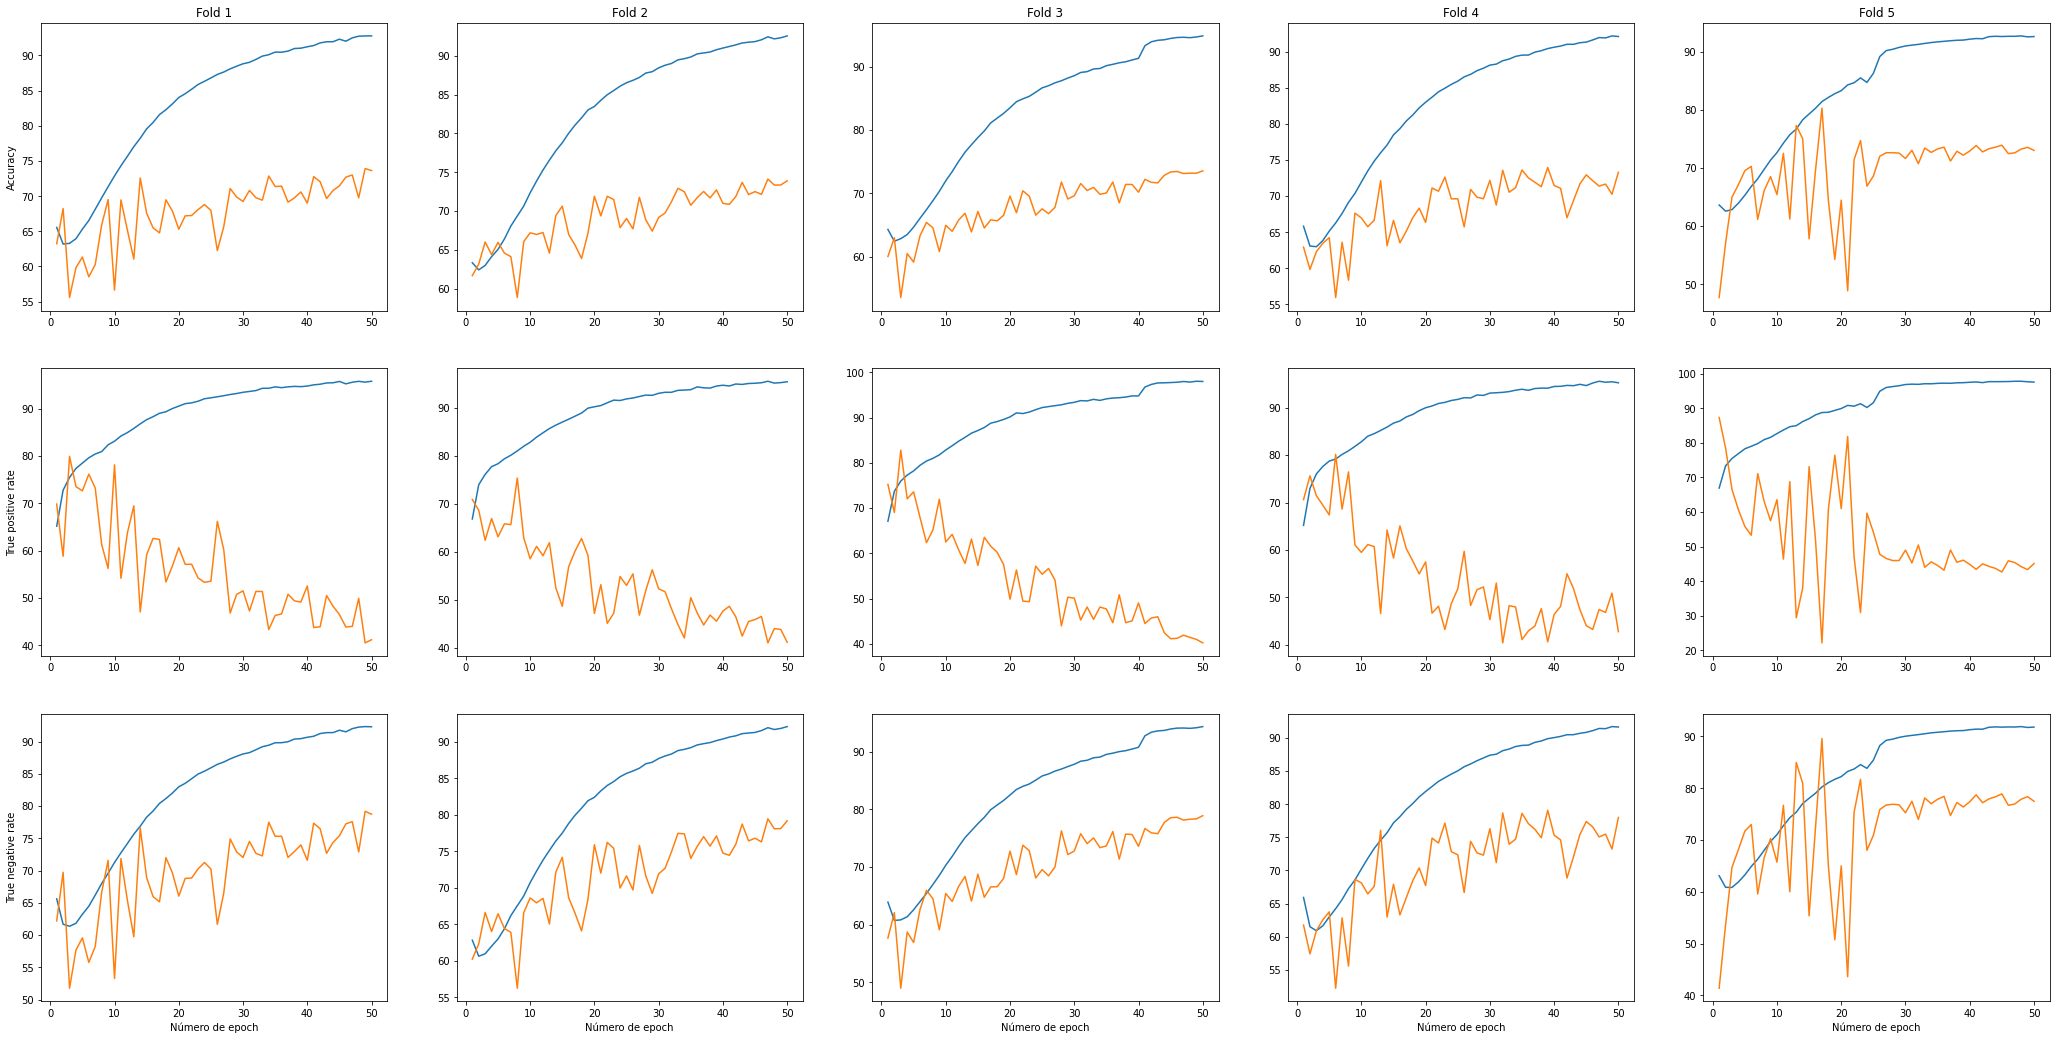

In [8]:
cross_val_data = pd.read_csv("training_info_nuevo_enfoque_con_fixation_rank.csv")
fig, ax = plt.subplots(3, 5, figsize = (36,18))
ax[0][0].set_ylabel("Accuracy")
ax[1][0].set_ylabel("True positive rate")
ax[2][0].set_ylabel("True negative rate")

for i in range(1,6):
    fold_data = cross_val_data[cross_val_data['n_fold']==i]
    training_data = fold_data[fold_data['train']==1.0]
    valid_data = fold_data[fold_data['valid']==1.0]
    ax[0][i-1].set_title(f"Fold {i}")

    ax[2][i-1].set_xlabel("Número de epoch")
    ax[0][i-1].plot(training_data['n_epoch'], training_data['acc'], label="train")
    ax[1][i-1].plot(training_data['n_epoch'],training_data['tpr'])
    ax[2][i-1].plot(training_data['n_epoch'],training_data['tnr'])
    ax[0][i-1].plot(valid_data['n_epoch'],valid_data['acc'], label="valid")
    ax[1][i-1].plot(valid_data['n_epoch'],valid_data['tpr'])
    ax[2][i-1].plot(valid_data['n_epoch'],valid_data['tnr'])

    